In [1]:
!pip install langdetect
!pip install googletrans
!pip install collections
!pip install googletrans==3.1.0a0
!pip install contractions
!pip install autocorrect

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
!pip install unidecode
!pip install emoji
!pip install wordcloud

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stem')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading stem: Package 'stem' not found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import pandas as pd
from langdetect import detect
from googletrans import Translator
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import contractions
from unidecode import unidecode
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("recession_tweets_oct_dec_22.csv")
data

,Unnamed: 0,Date,User,Tweet,likeCount,replyCount,retweetCount,location
0,0,2022-12-13 23:47:18+00:00,NickMorenoLive,They are barking loud now that they can't pay ...,0,0,0,United States
1,1,2022-12-13 23:46:49+00:00,InvariantPersp1,#recession ... #GFC2 US #CPI #Consumer #Inflat...,2,0,0,NaN
2,2,2022-12-13 23:46:02+00:00,FXStreetNews,GBP/JPY eyes downside to near 167.00 as furthe...,2,0,0,Barcelona
3,3,2022-12-13 23:37:23+00:00,Frugalology,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
4,4,2022-12-13 23:36:55+00:00,FrugalMag,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
...,...,...,...,...,...,...,...,...
34845,34845,2022-10-01 00:29:26+00:00,Nippi25James,"I’m so poor, I can’t even pay attention! #Mini...",0,0,0,UK
34846,34846,2022-10-01 00:25:54+00:00,Wealth_Nodes,Stanley Black and Decker cut about 1000 financ...,0,0,0,NaN
34847,34847,2022-10-01 00:16:46+00:00,MortgageMark,Prepare yourself accordingly #recession #canad...,1,0,0,"Burnaby, BC, CA, V5E 4G2"
34848,34848,2022-10-01 00:07:54+00:00,haqsmusings,#India central bank chief Das raises interest ...,1,0,0,"Silicon Valley, CA"


In [7]:
df = data[["User","Tweet","likeCount","replyCount","retweetCount","location"]]
df

,User,Tweet,likeCount,replyCount,retweetCount,location
0,NickMorenoLive,They are barking loud now that they can't pay ...,0,0,0,United States
1,InvariantPersp1,#recession ... #GFC2 US #CPI #Consumer #Inflat...,2,0,0,NaN
2,FXStreetNews,GBP/JPY eyes downside to near 167.00 as furthe...,2,0,0,Barcelona
3,Frugalology,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
4,FrugalMag,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
...,...,...,...,...,...,...
34845,Nippi25James,"I’m so poor, I can’t even pay attention! #Mini...",0,0,0,UK
34846,Wealth_Nodes,Stanley Black and Decker cut about 1000 financ...,0,0,0,NaN
34847,MortgageMark,Prepare yourself accordingly #recession #canad...,1,0,0,"Burnaby, BC, CA, V5E 4G2"
34848,haqsmusings,#India central bank chief Das raises interest ...,1,0,0,"Silicon Valley, CA"


In [8]:
def det_lang(data):
    lang = detect(data)
    return lang

In [9]:
from string import punctuation
#preprocessing
#1 remove_spaces
def remove_space(data):
  clean_text = data.replace("\n"," ").replace("/t"," ").replace("\\"," ").replace("http","").replace("#","").replace("recession","")
  return clean_text

def remove_emoji(data):
  clean_text = emoji.demojize(data)
  return clean_text


# contranction_mapping
def expand_text(data):
  clean_text = contractions.fix(data)
  return clean_text

#handling accented character
def acc_char(data):
  clean_text = unidecode(data)
  return clean_text

#removing remove stopwords
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

#lower the data
def lower_word(data):
  tokens = word_tokenize(data)
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and
                (len(word)>2) and (word.isalpha())]
  return clean_text

# autocorrect
def autocorrect(data):
  spell = Speller(lang='en')
  cor_word = spell(data)
  return cor_word

#lemetization
def lemmatizer(data):
  lemmatizer = WordNetLemmatizer()
  final_words = []
  for word in data:
    lem_word =  lemmatizer.lemmatize(word)
    final_words.append(lem_word)
  return " ".join(final_words)

In [10]:
df["language"] = df.Tweet.apply(det_lang)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2216\4010730957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"] = df.Tweet.apply(det_lang)


In [11]:
df["language"].value_counts()

en    34497
fr      183
it       73
sv       62
de       16
tl        6
da        3
nl        2
id        2
ca        2
et        1
ro        1
es        1
so        1
Name: language, dtype: int64

In [12]:
def lang_trans(data):
    trans = Translator()
    translated_text = trans.translate(data)
    return translated_text.text

In [13]:
lang_trans(df["Tweet"][0])

"They are barking loud now that they can't pay even the interest on their debt. It will be interesting to see who Biden gives this company to when he bails em out.\n\n#BlackRock\n#recession \n#interestrates https://t.co/nkz2xnshoU"

In [14]:
df["Trans_tweet"] = df.Tweet.apply(lang_trans)

ReadTimeout: The read operation timed out

In [ ]:
df

In [ ]:
clean_text_train = df.Trans_tweet.apply(remove_space)
clean_text_train = clean_text_train.apply(remove_emoji)
clean_text_train = clean_text_train.apply(expand_text)
clean_text_train = clean_text_train.apply(acc_char)
clean_text_train = clean_text_train.apply(lower_word)
# clean_text_train = clean_text_train.apply(autocorrect)
clean_text_train = clean_text_train.apply(lemmatizer)

In [ ]:
clean_text_train

0        barking loud not pay even interest debt intere...
1        cpi consumer inflation edition deflation defla...
2        eye downside near boe rate hike bolster gbpjpy...
3        frugal tip save money grocery inflation frugal...
4        frugal tip save money grocery inflation frugal...
                               ...                        
34845    poor not even pay attention minibudget poverty...
34846    stanley black decker cut finance job part mill...
34847                           prepare accordingly canada
34848    india central bank chief da raise interest rat...
34849    recession inflation centered tweet past recess...
Name: Trans_tweet, Length: 34850, dtype: object

In [ ]:
#EDA

def ngrams_extrct(data,ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range)
  ngram_list = []
  for i in ngram:
    ngram_list.append(' '.join(i))
  return ngram_list

In [ ]:
list_unigram = clean_text_train.apply(lambda x : ngrams_extrct(x,1))
final_unigram = []
for i in list_unigram:
  final_unigram.extend(i)

count = Counter(final_unigram).most_common(25)
print(count,end=" ")

[('inflation', 9958), ('layoff', 8446), ('recession', 8024), ('economy', 6416), ('not', 4886), ('job', 4303), ('market', 3827), ('robot', 3057), ('thelayoff', 2854), ('fed', 2722), ('business', 2620), ('stock', 2547), ('rate', 2357), ('economic', 2108), ('edition', 2085), ('year', 2063), ('global', 1991), ('whitecollarjobs', 1916), ('time', 1898), ('stockmarket', 1846), ('intel', 1830), ('intc', 1590), ('qcom', 1571), ('news', 1570), ('say', 1403)] 

In [ ]:
list_bigram = clean_text_train.apply(lambda x : ngrams_extrct(x,2))
final_bigram = []
for i in list_bigram:
  final_bigram.extend(i)

count = Counter(final_bigram).most_common(25)
print(count,end=" ")

[('layoff layoff', 3171), ('layoff thelayoff', 2791), ('whitecollarjobs layoff', 1915), ('job whitecollarjobs', 1905), ('thelayoff robot', 1770), ('bubble edition', 867), ('job layoff', 837), ('interest rate', 820), ('intel intc', 789), ('intc intc', 788), ('chip semiconductor', 786), ('thelayoff ibm', 786), ('semiconductor californiajobs', 785), ('californiajobs oregonjobs', 785), ('ibm qcom', 785), ('qcom qcom', 785), ('intc hightech', 783), ('oregonjobs job', 783), ('hightech chip', 782), ('qcom qualcomm', 779), ('qualcomm robot', 768), ('inflation recession', 702), ('recession inflation', 634), ('telco telcolayoffs', 541), ('telcolayoffs telecom', 541)] 

In [ ]:
list_trigram = clean_text_train.apply(lambda x : ngrams_extrct(x,3))
final_trigram = []
for i in list_trigram:
  final_trigram.extend(i)

count = Counter(final_trigram).most_common(25)
print(count,end=" ")

[('layoff layoff thelayoff', 2784), ('whitecollarjobs layoff layoff', 1910), ('job whitecollarjobs layoff', 1905), ('layoff thelayoff robot', 1724), ('job layoff layoff', 815), ('intel intc intc', 788), ('layoff thelayoff ibm', 786), ('chip semiconductor californiajobs', 785), ('semiconductor californiajobs oregonjobs', 785), ('thelayoff ibm qcom', 785), ('ibm qcom qcom', 785), ('intc intc hightech', 783), ('californiajobs oregonjobs job', 783), ('oregonjobs job layoff', 783), ('hightech chip semiconductor', 782), ('intc hightech chip', 781), ('qcom qcom qualcomm', 779), ('qcom qualcomm robot', 768), ('telco telcolayoffs telecom', 541), ('telcolayoffs telecom job', 539), ('telecom job whitecollarjobs', 537), ('att attandt telco', 513), ('attandt telco telcolayoffs', 513), ('automotivelayoffs autoindustry detroit', 418), ('autoindustry detroit michigan', 418)] 

In [ ]:
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ')
  text = ' '.join([word for word in df_.split()])
  wordcloud = WordCloud(width = 700,height = 500,background_color='white').generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

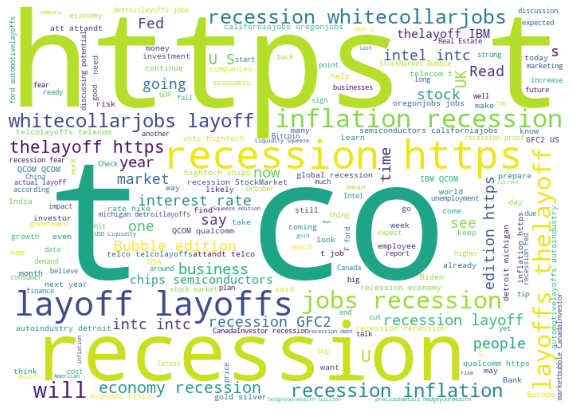

In [ ]:
wordcloud(df,'Trans_tweet')

In [ ]:
df.groupby('Trans_tweet').first()

,User,Tweet,likeCount,replyCount,retweetCount,location,language
Trans_tweet,,,,,,,
""" A #recession is a growth opportunity in disguise "" \n\nWell it is for the #Tories \n\n#GTAOnline https://t.co/rtmPgnvyWk",gffcontwitch,""" A #recession is a growth opportunity in disg...",0,0,1,united kingdom,en
""" From peddlers to young executives, they were all talking about potential recession and sharing tips combating the recession."" A personal note from my experiences. \n\nhttps://t.co/Q7pES1zakk\n\n#HIVE #mondaythoughts #recession",mac_wyls,""" From peddlers to young executives, they were...",2,0,0,wherever I may be,en
""" […] The historical record cautions strongly against prematurely loosening policy. We will stay the course, until the job is done.”\n– Jerome Powell, two days ago\n\nIs this pivoting? \n\n#NASDAQ #NASDAQ100 #SP500 #StockMarkets #VIX #email #recession #inflation #inflacja #energy",Fin_Eng_Net,""" […] The historical record cautions strongly ...",2,0,0,Germany,en
"""#Bitcoin Is Coming In For A HARD Landing..."" - Gareth Soloway Update\n\nhttps://t.co/1e0m509ApS\n\n#BitcoinNews #BitcoinPricePrediction #Crypto #Cryptocurrency #Currency #GarethSolowayBitcoinPrediction #Inflation #Markets #Recession #Stocks https://t.co/obIsshVjAW",bocvip,"""#Bitcoin Is Coming In For A HARD Landing..."" ...",0,0,0,None,en
"""#Brexit adds to the constraints on British growth, pushing labour and distribution costs higher, disrupting supply chains and erecting barriers to #exports to the UK’s largest market.""\n‘#Recession’ is far too mild a term for what Britain is about to face https://t.co/h9arLuvUOl",gas2green,"""#Brexit adds to the constraints on British gr...",0,0,0,"Preston, UK",en
...,...,...,...,...,...,...,...
🧵/2\n3 reasons why tech layoffs are not sign of impending #recession\n1. tech industry accounts small % of aggregate employment\n2. tech job openings remain above pre-pandemic level\n3. tech worker layoffs not historically been leading indicator of broader labor market deterioration https://t.co/2waqOdNq8Z,BlakeMillardCFA,🧵/2\n3 reasons why tech layoffs are not sign o...,2,0,1,"Annapolis, MD",en
"🧵Confused about what the #FTX Exchange, their CEO @SBF_FTX and client losses?\n\nLet me explain and help you use this info to develop Your Million-Dollar Crypto Investment Strategy!\n\n#Bitcoin #BTC #Finance #PersonalFinance #Investing #Trading #Economy #Recession #Ethereum https://t.co/NBfE9hsXb9",EconEthan,"🧵Confused about what the #FTX Exchange, their ...",0,2,0,Courses & Services 👉,en
"🧵In recent months, we have seen several significant challenges for #Crypto - here is a brief summary of the biggest crises that you need to be aware of.\n\n#Finance #PersonalFinance #Investing #Trading #Economy #Recession #Blockchain #Ethereum",EconEthan,"🧵In recent months, we have seen several signif...",0,1,0,Courses & Services 👉,en
